# Módulo 1: Análisis de datos en el ecosistema Python

### Sesión (18)

**30/01/2023**

## Aplicar un caso de uso (*Clasificación*)

In [1]:
# importamos las librerías necesarias 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
# Modificamos los parámetros de los gráficos en matplotlib
from matplotlib.pyplot import rcParams

rcParams['figure.figsize'] = 12, 6 # el primer dígito es el ancho y el segundo el alto
rcParams["font.weight"] = "bold"
rcParams["font.size"] = 10
rcParams["axes.labelweight"] = "bold"

### Dataset de cubierta forestal

**[Forest Covertype data](https://archive.ics.uci.edu/ml/datasets/Covertype)** es un conjunto de datos cargado en la librería _sklearn_ que permite realizar un ejercicio tipo problemas de **clasificación**. El objetivo de este dataset es **estudiar las variables cartográficas** para poder **predecir el tipo de cubierta forestal**. El tipo real de cubierta forestal para una observación (celda de 30 x 30 metros) se ha determinado a partir de los datos del **Servicio Forestal de EE.UU. (USFS)**. 

Los datos están en forma **cruda** (sin escalar) y contienen columnas binarias (0 o 1) de datos para variables independientes cualitativas (áreas silvestres y tipos de suelo).

Estas áreas de estudio representan **bosques con mínimas perturbaciones causadas por el hombre**, por lo que los tipos de cubierta forestal existentes son más el **resultado de procesos ecológicos**, que de prácticas de gestión forestal.

### Análisis Exploratorio Inicial, Tratamiento y Limpieza de datos

In [3]:
from sklearn.datasets import fetch_covtype

# Construimos un dataframe con los datos medidos de la cubierta forestal
dataset_cub = pd.DataFrame(fetch_covtype()["data"], columns=fetch_covtype()["feature_names"])

# Añadimos la variable objetivo
dataset_cub['target'] = fetch_covtype()["target"]

dataset_cub

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,target
0,2596.0,51.0,3.0,258.0,0.0,510.0,221.0,232.0,148.0,6279.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,2590.0,56.0,2.0,212.0,-6.0,390.0,220.0,235.0,151.0,6225.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
2,2804.0,139.0,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,6121.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,2785.0,155.0,18.0,242.0,118.0,3090.0,238.0,238.0,122.0,6211.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,2595.0,45.0,2.0,153.0,-1.0,391.0,220.0,234.0,150.0,6172.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396.0,153.0,20.0,85.0,17.0,108.0,240.0,237.0,118.0,837.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
581008,2391.0,152.0,19.0,67.0,12.0,95.0,240.0,237.0,119.0,845.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
581009,2386.0,159.0,17.0,60.0,7.0,90.0,236.0,241.0,130.0,854.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
581010,2384.0,170.0,15.0,60.0,5.0,90.0,230.0,245.0,143.0,864.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3


Vamos a sacar un dataset mucho más pequeño para **simplificar los cálculos** y **reducir el tiempo de computación** de los algoritmos. Una primera idea para extraer un subconjunto podría ser quedarnos por ejemplo con los **_100.000_ primeros registros** de la tabla.

In [ ]:
dataset_cub[0:100000]

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,target
0,2596.0,51.0,3.0,258.0,0.0,510.0,221.0,232.0,148.0,6279.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,2590.0,56.0,2.0,212.0,-6.0,390.0,220.0,235.0,151.0,6225.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
2,2804.0,139.0,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,6121.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,2785.0,155.0,18.0,242.0,118.0,3090.0,238.0,238.0,122.0,6211.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,2595.0,45.0,2.0,153.0,-1.0,391.0,220.0,234.0,150.0,6172.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,3100.0,52.0,16.0,376.0,50.0,3816.0,227.0,203.0,105.0,4295.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
99996,3090.0,50.0,16.0,361.0,40.0,3840.0,225.0,202.0,106.0,4268.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
99997,3083.0,45.0,18.0,335.0,33.0,3864.0,222.0,198.0,104.0,4241.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
99998,3077.0,41.0,15.0,309.0,43.0,3889.0,221.0,205.0,116.0,4214.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


El posible peligro de este enfoque es que **no obtengamos un subconjunto muy representativo**. Realizamos una consulta sobre una de las variables del datset para ver si estadísticamente tienen las mismas características o no. 

In [ ]:
dataset_cub['Elevation'].describe()[['count', 'mean', 'std']]

count    581012.000000
mean       2959.365301
std         279.984734
Name: Elevation, dtype: float64

In [ ]:
dataset_cub[0:100000]['Elevation'].describe()[['count', 'mean', 'std']]

count    100000.000000
mean       2862.036680
std         231.376584
Name: Elevation, dtype: float64

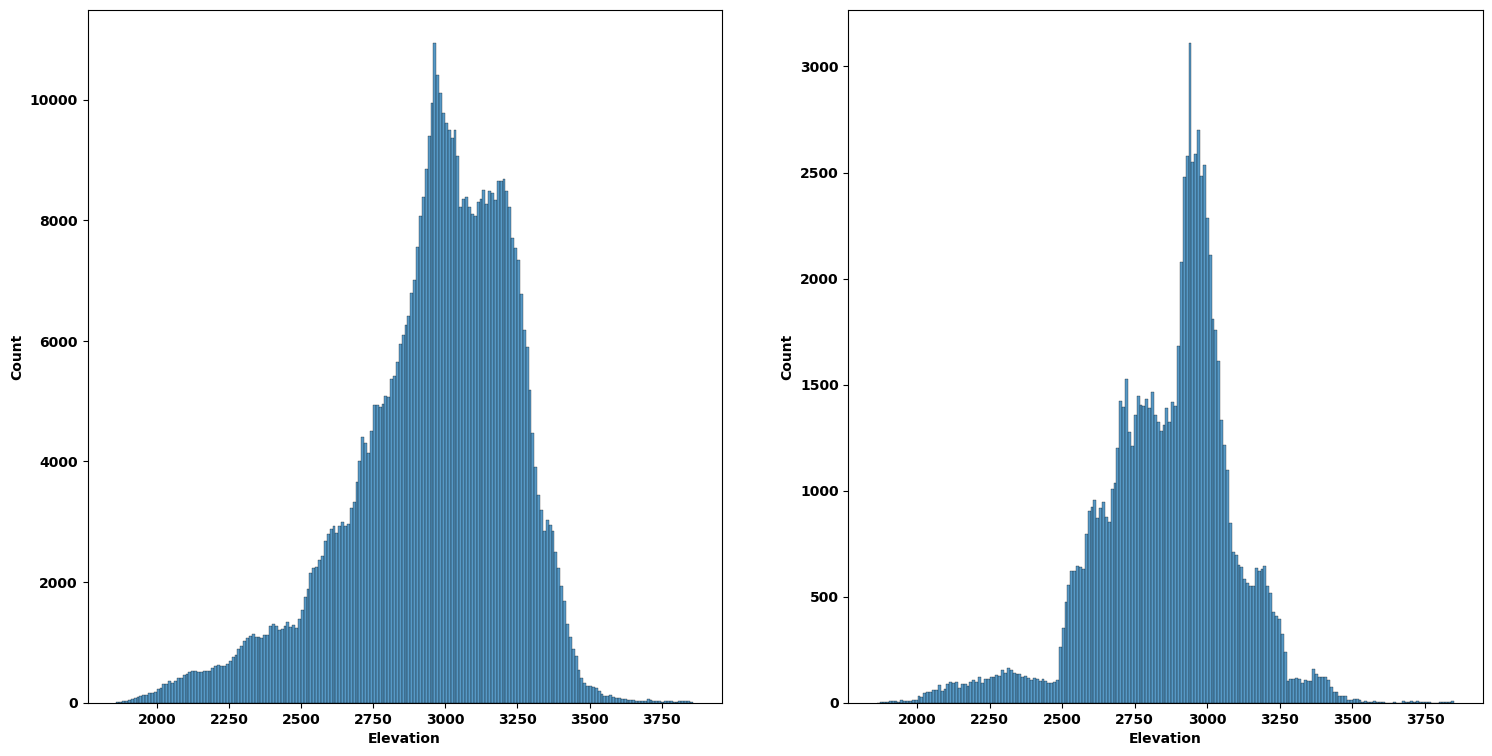

In [ ]:
# Comparar la distribución de la variable "Elevation" entre los dos Dataframes
fig, axes = plt.subplots(1, 2, figsize=(18,9))
sns.histplot(dataset_cub['Elevation'], bins=200, ax=axes[0])
sns.histplot(dataset_cub[0:100000]['Elevation'], bins=200, ax=axes[1])
plt.show()

Se puede observar que la variable analizada no tiene la misma representación en el subconjunto de los _100.000_ primeros registros del dataset. Otra opción para conseguir un trozo de los datos originales, sería aplicar la técnica de **remuestro aleatorio (_random resampling_)**.

Vamos a hacer un remuestreo aleatorio para **quedarnos aproximadamente con el 17% de los datos** usando el método **[sample](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html)** sobre los _DataFrames_ de la librería _pandas_:

In [ ]:
100/6

16.666666666666668

In [4]:
df_cub = dataset_cub.sample(frac=1/5.81012, random_state=222).reset_index(drop=True)
df_cub

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,target
0,3311.0,3.0,13.0,551.0,106.0,2780.0,202.0,215.0,149.0,2220.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,7
1,2429.0,70.0,29.0,95.0,18.0,1589.0,237.0,169.0,43.0,391.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
2,2324.0,315.0,14.0,124.0,43.0,391.0,182.0,228.0,185.0,560.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
3,2959.0,346.0,10.0,90.0,20.0,5876.0,200.0,223.0,162.0,3979.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,2910.0,62.0,15.0,330.0,97.0,3246.0,231.0,208.0,106.0,2275.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2908.0,59.0,15.0,633.0,271.0,1036.0,230.0,208.0,107.0,577.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
99996,2379.0,292.0,21.0,95.0,37.0,1321.0,155.0,230.0,213.0,330.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6
99997,2786.0,147.0,7.0,42.0,7.0,2162.0,229.0,239.0,143.0,1574.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
99998,2863.0,36.0,10.0,514.0,26.0,2746.0,219.0,217.0,132.0,3550.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2


In [ ]:
# Consultamos las principales esdadísticas de la variable analizada anteriormente
df_cub['Elevation'].describe()[['count', 'mean', 'std']]

count    100000.000000
mean       2959.010060
std         279.864034
Name: Elevation, dtype: float64

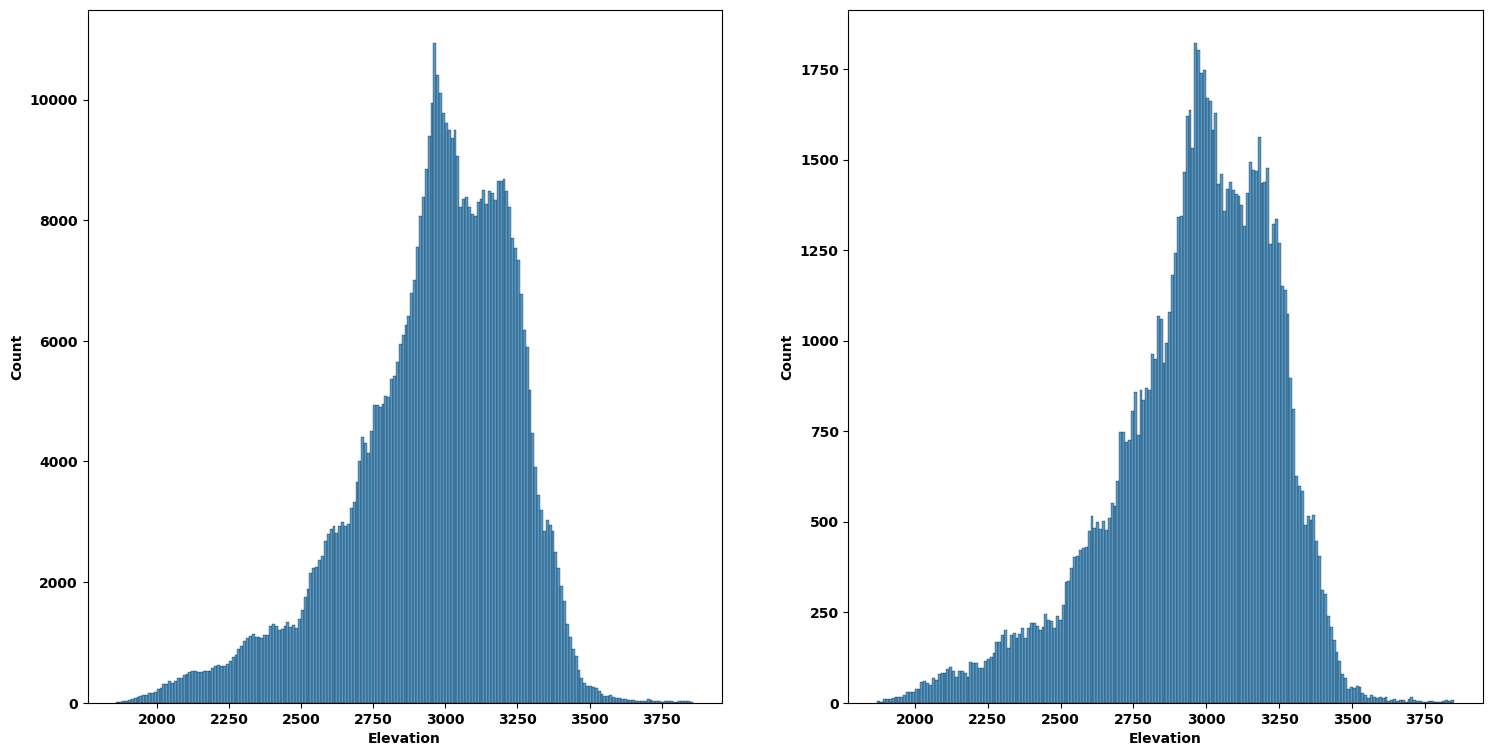

In [ ]:
# Comparar la distribución de la variable "Elevation" entre el DataFrame original y el subconjunto obtenido mediante el remuestreo aleatorio
fig, axes = plt.subplots(1, 2, figsize=(18,9))
sns.histplot(dataset_cub['Elevation'], bins=200, ax=axes[0])
sns.histplot(df_cub['Elevation'], bins=200, ax=axes[1])
plt.show()

Podemos ver que este último subconjunto, a pesar de tener solamente 17% de los datos, **sí que incluye un set de observaciones muy representativas** respecto al dataset original. 

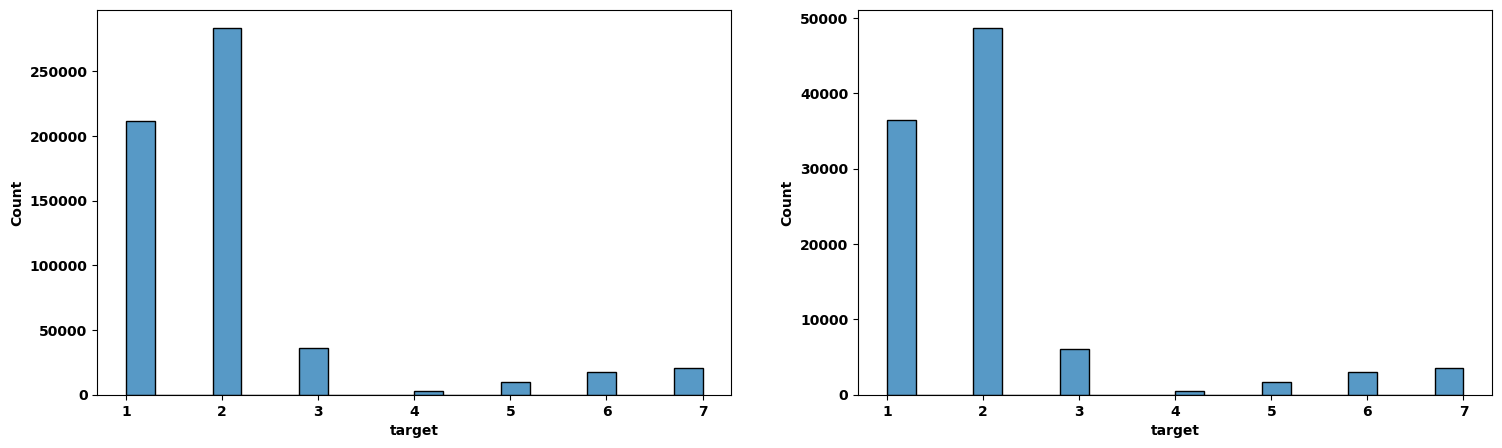

In [ ]:
# Comparar la distribución de la variable objetivo entre los dos Dataframes
fig, axes = plt.subplots(1, 2, figsize=(18,5))
sns.histplot(dataset_cub['target'], bins=20, ax=axes[0])
sns.histplot(df_cub['target'], bins=20, ax=axes[1])
plt.show()

In [ ]:
df_cub.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,target
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000
mean,2959.010060,155.927130,14.078440,268.415310,45.890660,2356.444880,212.226180,223.392060,142.541110,1984.702670,...,0.091120,0.078660,0.003050,0.003510,0.000190,0.000510,0.026360,0.023650,0.014600,2.05919
std,279.864034,111.880189,7.466349,212.389266,57.923415,1559.881883,26.567206,19.768911,38.116316,1328.355754,...,0.287781,0.269209,0.055143,0.059141,0.013783,0.022578,0.160204,0.151957,0.119946,1.40864
min,1871.000000,0.000000,0.000000,0.000000,-164.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000
25%,2810.000000,59.000000,9.000000,108.000000,7.000000,1110.000000,198.000000,213.000000,119.000000,1022.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000
50%,2995.000000,127.000000,13.000000,218.000000,29.000000,2005.000000,218.000000,226.000000,143.000000,1712.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.00000
75%,3163.000000,261.000000,18.000000,384.000000,68.000000,3336.000000,231.000000,237.000000,168.000000,2553.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.00000
max,3849.000000,360.000000,66.000000,1390.000000,592.000000,7117.000000,254.000000,254.000000,253.000000,7168.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.00000


In [ ]:
df_cub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Elevation                           100000 non-null  float64
 1   Aspect                              100000 non-null  float64
 2   Slope                               100000 non-null  float64
 3   Horizontal_Distance_To_Hydrology    100000 non-null  float64
 4   Vertical_Distance_To_Hydrology      100000 non-null  float64
 5   Horizontal_Distance_To_Roadways     100000 non-null  float64
 6   Hillshade_9am                       100000 non-null  float64
 7   Hillshade_Noon                      100000 non-null  float64
 8   Hillshade_3pm                       100000 non-null  float64
 9   Horizontal_Distance_To_Fire_Points  100000 non-null  float64
 10  Wilderness_Area_0                   100000 non-null  float64
 11  Wilderness_Area_1          

In [ ]:
# Conteo de valores perdidos/faltantes  
df_cub.isna().sum().sum()

0

In [ ]:
# Consultamos los registros que tienen algún valor nulo
df_cub.drop(df_cub.dropna().index)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,target


### Reducción de Variables (___Dimensionality Reduction___)

### **`Ejercicio 18.1`**

Para conseguir un dataset con una dimensión reducidad, aplica la técnica de **Selección de variables basada en árbol de decisión** mediante las importancias de cada variable (**`Decision Trees Importances`**):

- Filtra el tablón para quedarnos solamente con **las variables que aglutinan hasta el `95%` de la información** que se requiere para estimar la variable objetivo.
- `random_state=100`

In [5]:
df_ejercicio = dataset_cub.sample(frac=95/100, random_state=100).reset_index(drop=True)
df_ejercicio

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,target
0,2902.0,231.0,16.0,42.0,10.0,2145.0,193.0,253.0,194.0,1443.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
1,2884.0,33.0,12.0,350.0,58.0,872.0,218.0,214.0,131.0,1544.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
2,3157.0,243.0,6.0,175.0,29.0,2766.0,207.0,245.0,176.0,641.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,2972.0,246.0,9.0,703.0,76.0,6091.0,203.0,247.0,182.0,5800.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,2549.0,172.0,11.0,67.0,4.0,2602.0,228.0,245.0,148.0,2324.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551956,2814.0,313.0,24.0,300.0,113.0,1120.0,147.0,213.0,202.0,2438.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
551957,2680.0,259.0,29.0,90.0,31.0,1651.0,137.0,241.0,234.0,1236.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
551958,2882.0,332.0,25.0,150.0,41.0,1500.0,155.0,200.0,180.0,1211.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
551959,2678.0,76.0,19.0,150.0,30.0,949.0,240.0,200.0,83.0,1898.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2


---

### **`Ejercicio 18.2`**

Después de filtrar el dataset vamos a plantear un **problema de clasificación** para conseguir un **clasificador de la cubierta forestal** en basea a las **variables cartográficas**.:  

**`18.2.1`** Genera una gráfica para visualizar la distribución de las variables del datset en conjunto. Analiza dicha gráfica y explica si hay una necesidad de normalizar los datos.  

**`18.2.2`** Normaliza todas las variables del dataset a una escala estándar. Para ello puedes realizar estas transformaciones:

- LLevar las variables de entrada a una escala de `0` a `1`
- Convertir la variable objetivo en valores numéricos **entre 0 y el número de clases menos 1**

**`18.2.1`**

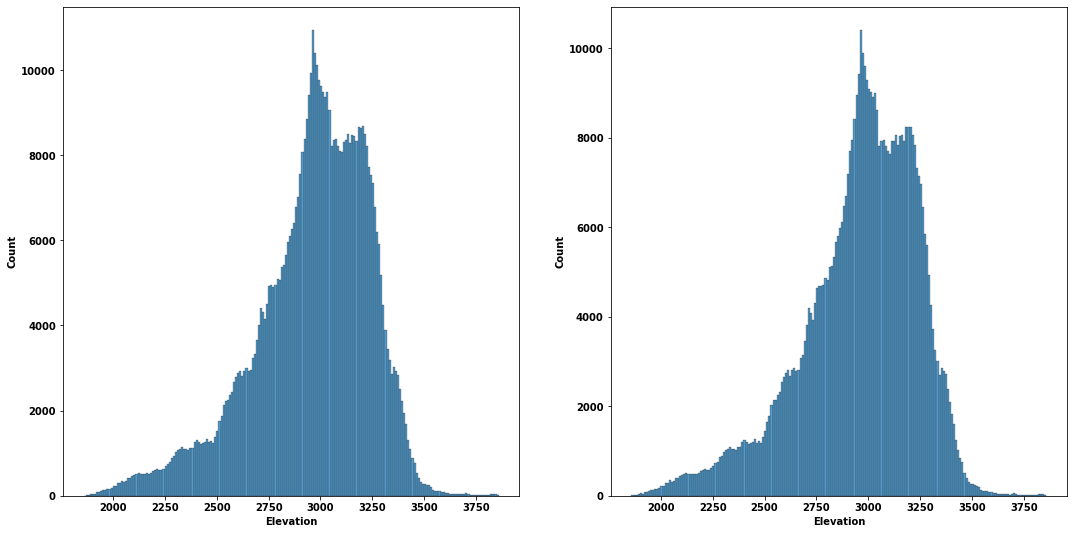

In [ ]:
# Comparar la distribución de la variable "Elevation" entre el DataFrame original y el subconjunto obtenido mediante el remuestreo aleatorio
fig, axes = plt.subplots(1, 2, figsize=(18,9))
sns.histplot(dataset_cub['Elevation'], bins=200, ax=axes[0])
sns.histplot(df_ejercicio['Elevation'], bins=200, ax=axes[1])
plt.show()

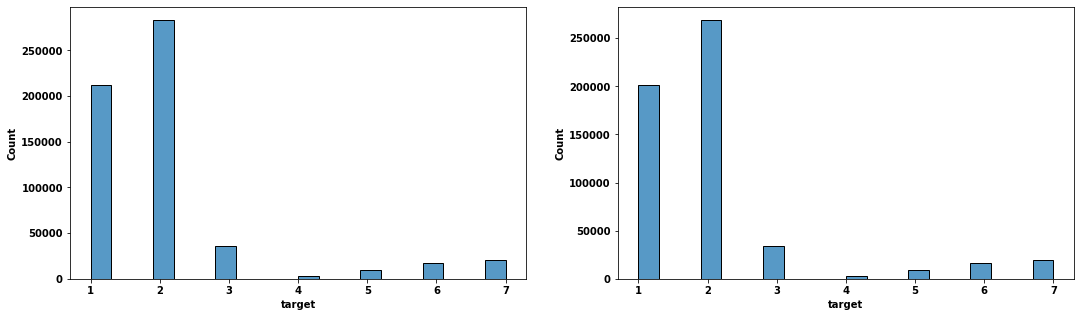

In [ ]:
# Comparar la distribución de la variable objetivo entre los dos Dataframes
fig, axes = plt.subplots(1, 2, figsize=(18,5))
sns.histplot(dataset_cub['target'], bins=20, ax=axes[0])
sns.histplot(df_ejercicio['target'], bins=20, ax=axes[1])
plt.show()

**`18.2.2`**

In [6]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_aux=df_ejercicio.loc[:,df_ejercicio.columns !='target']
array_final=scaler.fit_transform(df_aux)
df_final=pd.DataFrame(array_final,columns=df_aux.columns)
df_final['target']=df_ejercicio["target"]-1

In [ ]:
df_final.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,target
count,551961.000000,551961.000000,551961.000000,551961.000000,551961.000000,551961.000000,551961.000000,551961.000000,551961.000000,551961.000000,...,551961.000000,551961.000000,551961.000000,551961.000000,551961.000000,551961.000000,551961.000000,551961.000000,551961.000000,551961.000000
mean,0.550354,0.432378,0.213752,0.192772,0.283460,0.330138,0.835205,0.879165,0.561098,0.276116,...,0.090329,0.077761,0.002745,0.003252,0.000201,0.000515,0.026783,0.023777,0.015037,1.051779
std,0.140102,0.310877,0.113490,0.152124,0.075280,0.219117,0.105442,0.077886,0.150746,0.184642,...,0.286653,0.267795,0.052319,0.056934,0.014180,0.022677,0.161448,0.152354,0.121701,1.396828
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.475238,0.161111,0.136364,0.077309,0.232558,0.155122,0.779528,0.838583,0.468504,0.142758,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.568284,0.352778,0.196970,0.156049,0.262274,0.280455,0.858268,0.889764,0.562992,0.238394,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.652326,0.725000,0.272727,0.274875,0.312661,0.467613,0.909449,0.933071,0.661417,0.355500,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000


---

### **`Ejercicio 18.3`**

Después de estandarizar los datos procedemos a crear el **primer clasificador**:  

**`18.3.1`** Divide el datset en _training_ y en _test_:
- Guarda el `20%` de los datos para testeo.
- `random_state=100`  

**`18.3.2`** Entrena un modelo de **regresión logística**:
- Número máximo de iteraciones igual a `1000`
- `random_state=100`

**`18.3.3`** Calcula diferentes métricas para evaluar este modelo y analiza su rendimiendo.
- Accuracy
- F1-score `(average='weighted')`
- Classification report `(zero_division=0)`
- Confusion matrix

**`18.3.1`**

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_final.loc[:,df_final.columns !='target'], df_final['target'], test_size=0.2, random_state=100)

**`18.3.2`**

In [8]:
from sklearn.linear_model import LogisticRegression

# Paso 4: Creamos una instancia de la Regresión Logística
regresion_logistica = LogisticRegression(max_iter=1000,random_state=100)
regresion_logistica.fit(X_train,y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=100)

**`18.3.3`**

In [9]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [ ]:
predictions = regresion_logistica.predict(X_test)
print(accuracy_score(y_test, predictions))

0.72405859067151


In [ ]:
print(f1_score(y_test, predictions,average='weighted'))

0.7131677393102442


In [ ]:
print(classification_report(y_test, predictions,zero_division=0))

              precision    recall  f1-score   support

           0       0.71      0.70      0.70     40051
           1       0.75      0.80      0.77     54101
           2       0.66      0.83      0.74      6784
           3       0.62      0.37      0.46       532
           4       0.15      0.00      0.01      1845
           5       0.49      0.22      0.30      3269
           6       0.72      0.57      0.63      3811

    accuracy                           0.72    110393
   macro avg       0.59      0.50      0.52    110393
weighted avg       0.71      0.72      0.71    110393



In [ ]:
print(confusion_matrix(y_test, predictions))

[[27940 11300    10     0     0    10   791]
 [ 9711 43272   797     3    30   233    55]
 [    0   599  5648   104     1   432     0]
 [    0     1   260   197     0    74     0]
 [   16  1769    47     0     7     6     0]
 [    0   801  1732    16     8   712     0]
 [ 1629    27     0     0     0     0  2155]]


---

### **`Ejercicio 18.4`**

Ahora probamos la creación de otros modelo basados en **árboles de decisión**:  

**`18.4.1`** Entrena un modelo tipo **Decision Tree Classifire** y calcula las métricas correspondientes para analizar su rendimiento en comparación con el modelo anterior:
- `random_state=100`
- Accuracy
- F1-score `(average='weighted')`
- Classification report `(zero_division=0)`

**`18.4.2`** Saca la curva de complejidad del modelo _Decision Tree_ (**Model Complexity Curve**) y crea un nuevo clasificador **con el valor óptimo de la profundidad del árbol** según esta gráfica. Después saca las métricas correspondiente y analiza el rendimiento del modelo en comparación de los anteriores.
- `random_state=100`
- rango de profundidades:  de `2` a `30` __inclusive__

**`18.4.3`** Saca la gráfica de el *Learning Curve* para estos modelos, definiendo y aplicando una función que toma el valor del hiperparámetro como su entrada y dibuja la evolución del rendimiento del modelo para el conjunto de training y de test. Explica si este último modelo tiene preferencia o no, comparando con modelos anteriores.
- `random_state=100`
- (*Sugerencia*: No incluya más de 10 puntos en el eje horizontal y empieza la gráfica con un mínimo de _1000_ muestras para el modelo)

In [10]:
from sklearn.tree import DecisionTreeClassifier

**`18.4.1`**

In [11]:
arbol=DecisionTreeClassifier(random_state=100)
registros=arbol.fit(X_train,y_train)

In [13]:
arbol_predictions = arbol.predict(X_test)
print(accuracy_score(y_test, arbol_predictions))

0.9378130859746542


In [ ]:
print(f1_score(y_test, arbol_predictions,average='weighted'))

0.9377250490791295


In [ ]:
print(classification_report(y_test, arbol_predictions,zero_division=0))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94     40051
           1       0.95      0.95      0.95     54101
           2       0.93      0.93      0.93      6784
           3       0.84      0.83      0.83       532
           4       0.84      0.83      0.83      1845
           5       0.88      0.88      0.88      3269
           6       0.94      0.95      0.94      3811

    accuracy                           0.94    110393
   macro avg       0.90      0.90      0.90    110393
weighted avg       0.94      0.94      0.94    110393



**`18.4.2`**

In [17]:
from sklearn.model_selection import validation_curve

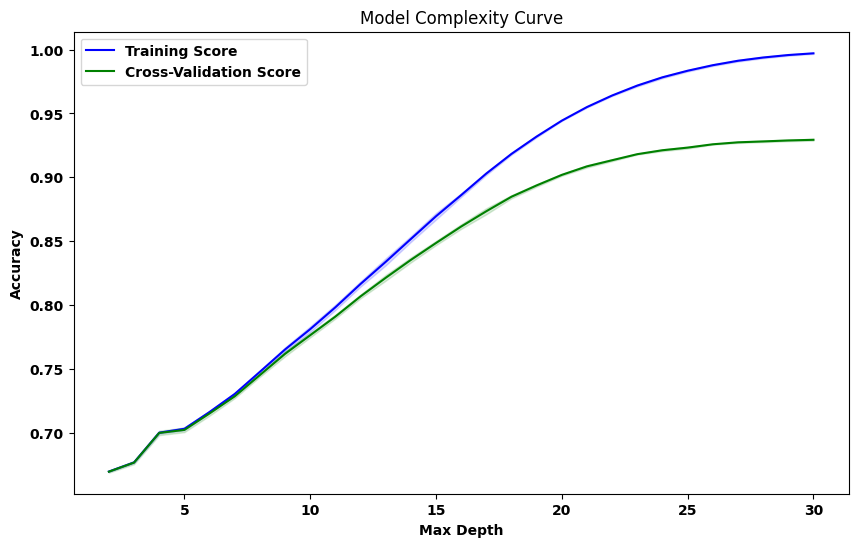

In [ ]:
depth_range = range(2, 31)

train_scores, test_scores = validation_curve(arbol, X_train, y_train,param_name="max_depth",param_range=depth_range,
                                             cv=5, scoring="accuracy")

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.title('Model Complexity Curve')
plt.plot(depth_range, train_mean, label='Training Score', color='blue')
plt.fill_between(depth_range, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')
plt.plot(depth_range, test_mean, label='Cross-Validation Score', color='green')
plt.fill_between(depth_range, test_mean - test_std, test_mean + test_std, alpha=0.15, color='green')
plt.legend()
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.show()

**`18.4.3`**

La diferencia final del rendimiento del modelo entre training y test es=  0.062250323842997335


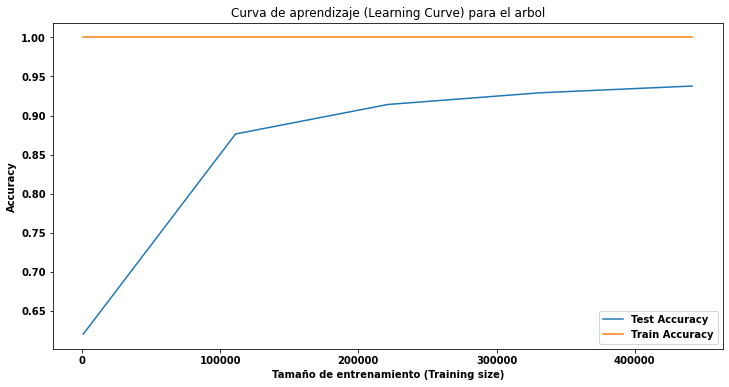

In [ ]:
# Crear un listado de los tamaños de subconjuntos de datos de entrenamiento
num_samples = np.linspace(1000,X_train.shape[0],5).astype(int)

# Generamos previamente los vectores necesarios para ir calculando y guardando el rendimiento
train_score = np.zeros(num_samples.size) 
test_score = np.zeros(num_samples.size)


for i in range(num_samples.size):
    # Generamos un modelo para cada subconjunto de datos de entrenamiento y lo ajustamos  
    arbol.fit(X_train[:num_samples[i]], y_train[:num_samples[i]])

    # Calculamos el área bajo la curva de funcionamiento del receptor sobre datos de train y de test
    train_score[i] = accuracy_score(y_train[:num_samples[i]], arbol.predict(X_train[:num_samples[i]])) 
    test_score[i] = accuracy_score(y_test, arbol.predict(X_test))

print("La diferencia final del rendimiento del modelo entre training y test es= ", train_score[-1]-test_score[-1])

# Graficamos el rendimiento de training versus de test
plt.plot(num_samples, test_score, label = 'Test Accuracy')
plt.plot(num_samples, train_score, label = 'Train Accuracy')
plt.title('Curva de aprendizaje (Learning Curve) para el arbol')
plt.xlabel('Tamaño de entrenamiento (Training size)')
plt.ylabel('Accuracy')
plt.legend(loc = 'lower right') 

---

### **`Ejercicio 18.5`**

Ahora probamos la creación de otros modelo basados en **bosques aleatorios**:  

**`18.5.1`** Entrena un modelo tipo **Random Forest Classifire** y calcula las métricas correspondientes para analizar su rendimiento en comparación con los modelos anteriores:
- `random_state=100`

**`18.5.2`** Consulta la profundidad de todos los árboles del bosque creado en el paso anterior y calcula la mediana de este parámetro.

**`18.5.3`** Saca las curvas de complejidad del modelo _Random Forest_ (**Model Complexity Curve**) y crea un nuevo clasificador **con los valores óptimos** analizados dentro de los rangos indicados para cada hiperparámeto. Después crea un modelo con estos parámetros "óptimos" y saca las métricas correspondientes para analizar el rendimiento del modelo en comparación con los anteriores.
- `random_state=100`
- define un rango con funciones de _numpy_ para considerar estos números de árboles: `[200, 250, 300, 350, 400]`  
- rango de profundidades:  de `20` a `40` __inclusive__ en pasos de 2 en 2.
- considera estas opciones para _max_features_ : `["auto", "log2", None]`
- Accuracy
- F1-score `(average='weighted')`
- Classification report `(zero_division=0)`
- **OOB** (out-of-bag score)

**`18.5.4`** Saca la gráfica del *Learning Curve* para estos modelos, definiendo y aplicando una función que toma el valor de los hiperparámetros analizados como su entrada y dibuja la evolución del rendimiento del modelo para el conjunto de training y de test. Explica si este último modelo tiene preferencia o no, comparando con modelos anteriores.
- `random_state=100`
- (*Sugerencia*: No incluya más de 10 puntos en el eje horizontal y empieza la gráfica con un mínimo de _1000_ muestras para el modelo)

In [14]:
from sklearn.ensemble import RandomForestClassifier

**`18.5.1`**

In [15]:
random_forest=RandomForestClassifier(random_state=100)
random_forest.fit(X_train,y_train)

RandomForestClassifier(random_state=100)

In [ ]:
forest_predictions = random_forest.predict(X_test)
print(accuracy_score(y_test, forest_predictions))

0.9540188236572971


In [ ]:
print(f1_score(y_test, forest_predictions,average='weighted'))

0.9537635033117671


In [ ]:
print(classification_report(y_test, forest_predictions,zero_division=0))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95     40051
           1       0.95      0.97      0.96     54101
           2       0.94      0.96      0.95      6784
           3       0.91      0.82      0.86       532
           4       0.95      0.76      0.85      1845
           5       0.94      0.90      0.92      3269
           6       0.97      0.95      0.96      3811

    accuracy                           0.95    110393
   macro avg       0.95      0.90      0.92    110393
weighted avg       0.95      0.95      0.95    110393



In [ ]:
print(confusion_matrix(y_test, forest_predictions))

[[37798  2143     3     0    12     2    93]
 [ 1278 52590   110     0    62    48    13]
 [    0   124  6515    28     3   114     0]
 [    0     0    76   438     0    18     0]
 [   31   382    17     0  1410     5     0]
 [    6   100   204    15     4  2940     0]
 [  166    19     0     0     0     0  3626]]


**`18.5.2`**

In [ ]:
print(random_forest.n_estimators)
print(random_forest.max_depth)

100
None


**`18.5.3`**

In [ ]:
depth_range = range(2, 31)

train_scores, test_scores = validation_curve(random_forest, X_train, y_train,param_name="max_depth",param_range=depth_range,
                                             cv=5, scoring="accuracy")

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.title('Model Complexity Curve')
plt.plot(depth_range, train_mean, label='Training Score', color='blue')
plt.fill_between(depth_range, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')
plt.plot(depth_range, test_mean, label='Cross-Validation Score', color='green')
plt.fill_between(depth_range, test_mean - test_std, test_mean + test_std, alpha=0.15, color='green')
plt.legend()
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.show()

**`18.5.4`**

La diferencia final del rendimiento del modelo entre training y test es=  0.045981176342702934


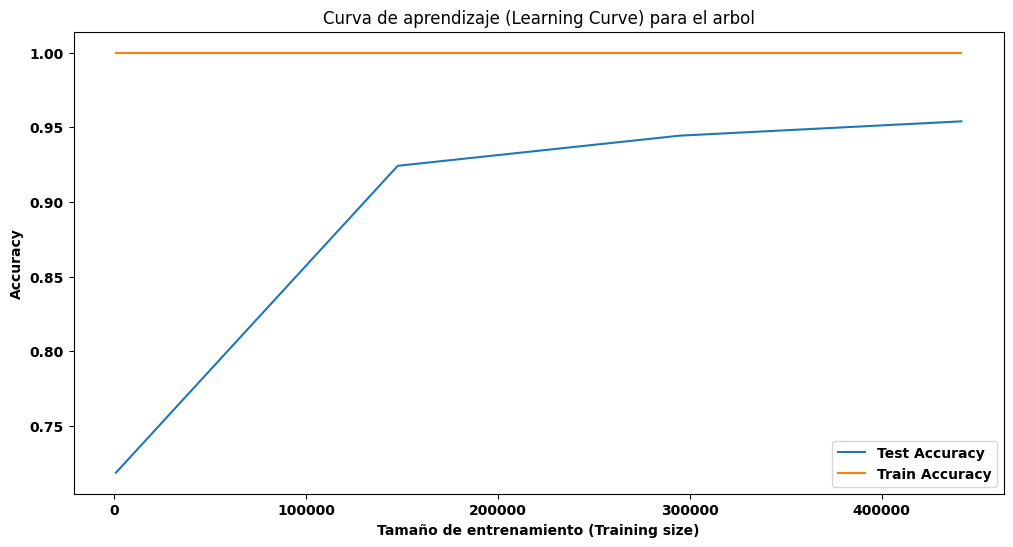

In [ ]:
# Crear un listado de los tamaños de subconjuntos de datos de entrenamiento
num_samples = np.linspace(1000,X_train.shape[0],4).astype(int)

# Generamos previamente los vectores necesarios para ir calculando y guardando el rendimiento
train_score = np.zeros(num_samples.size) 
test_score = np.zeros(num_samples.size)


for i in range(num_samples.size):
    # Generamos un modelo para cada subconjunto de datos de entrenamiento y lo ajustamos  
    random_forest.fit(X_train[:num_samples[i]], y_train[:num_samples[i]])

    # Calculamos el área bajo la curva de funcionamiento del receptor sobre datos de train y de test
    train_score[i] = accuracy_score(y_train[:num_samples[i]], random_forest.predict(X_train[:num_samples[i]])) 
    test_score[i] = accuracy_score(y_test, random_forest.predict(X_test))

print("La diferencia final del rendimiento del modelo entre training y test es= ", train_score[-1]-test_score[-1])

# Graficamos el rendimiento de training versus de test
plt.plot(num_samples, test_score, label = 'Test Accuracy')
plt.plot(num_samples, train_score, label = 'Train Accuracy')
plt.title('Curva de aprendizaje (Learning Curve) para el arbol')
plt.xlabel('Tamaño de entrenamiento (Training size)')
plt.ylabel('Accuracy')
plt.legend(loc = 'lower right') 

---

### **`Ejercicio 18.6`**

Ahora probamos la creación de otros modelo basados en **Gradient Boosting**:  

**`18.6.1`** Entrena un modelo tipo **XGBoost Classifire** y calcula las métricas correspondientes para analizar su rendimiento en comparación con los modelos anteriores:
- `random_state=100`

**`18.6.2`** Consulta el número y la profundidad máxima de los árboles del bosque creado en el paso anterior.

**`18.6.3`** Saca las curvas de complejidad del modelo _XGBClassifier_ (**Model Complexity Curve**) y crea un nuevo clasificador **con los valores óptimos** analizados dentro de los rangos indicados para cada hiperparámeto. Después crea un modelo con estos parámetros "óptimos" y saca las métricas correspondientes para analizar el rendimiento del modelo en comparación con los anteriores.
- `random_state=100`
- define un rango con funciones de _numpy_ para considerar estos números de árboles: `[100, 200, 300, 400, 500]`  
- rango de profundidades:  de `6` a `20` __inclusive__ en pasos de 2 en 2.
- valores a considerar para el *`learning_rate`*: `[0.01, 0.1, 0.3, 0.5]`
- Accuracy
- F1-score `(average='weighted')`
- Classification report `(zero_division=0)`

**`18.6.4`** Saca la gráfica del *Learning Curve* para estos modelos, definiendo y aplicando una función que toma el valor de los hiperparámetros analizados como su entrada y dibuja la evolución del rendimiento del modelo para el conjunto de training y de test. Explica si este último modelo tiene preferencia o no, comparando con modelos anteriores.
- `random_state=100`
- (*Sugerencia*: No incluya más de 10 puntos en el eje horizontal y empieza la gráfica con un mínimo de _1000_ muestras para el modelo)

**`18.6.1`**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
XGBoost=GradientBoostingClassifier(random_state=100)
XGBoost.fit(X_train,y_train)

In [ ]:
XG_predictions = XGBoost.predict(X_test)
print(accuracy_score(y_test, XG_predictions))

0.7737990633464078


In [ ]:
print(f1_score(y_test, XG_predictions,average='weighted'))

0.7696351625885696


In [ ]:
print(classification_report(y_test, XG_predictions,zero_division=0))

              precision    recall  f1-score   support

           0       0.76      0.75      0.75     40051
           1       0.78      0.83      0.81     54101
           2       0.77      0.83      0.80      6784
           3       0.82      0.70      0.75       532
           4       0.77      0.22      0.34      1845
           5       0.66      0.46      0.54      3269
           6       0.85      0.71      0.77      3811

    accuracy                           0.77    110393
   macro avg       0.77      0.64      0.68    110393
weighted avg       0.77      0.77      0.77    110393



In [ ]:
print(confusion_matrix(y_test, XG_predictions))

[[29929  9634    15     0    20    18   435]
 [ 8351 44859   454     0    90   316    31]
 [    0   643  5643    68     3   426     1]
 [    0     0   147   371     0    14     0]
 [   21  1376    37     0   408     3     0]
 [    0   699  1034    14     7  1515     0]
 [ 1106     8     0     0     0     0  2697]]


**`18.6.2`**

In [ ]:
print(XGBoost.n_estimators)
print(XGBoost.max_depth)

100
3


**`18.6.3`**

In [ ]:
# Definir el rango de profundidades
depth_range = range(2, 31)

# Calcular la precisión en el conjunto de entrenamiento y prueba para cada profundidad
train_scores, test_scores = validation_curve(XGBoost, X_train, y_train,param_name="max_depth",param_range=depth_range,
                                             cv=5, scoring="accuracy")

# Calcular la media y la desviación estándar de la precisión en cada profundidad
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Graficar la curva de complejidad
plt.figure(figsize=(10, 6))
plt.title('Model Complexity Curve')
plt.plot(depth_range, train_mean, label='Training Score', color='blue')
plt.fill_between(depth_range, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')
plt.plot(depth_range, test_mean, label='Cross-Validation Score', color='green')
plt.fill_between(depth_range, test_mean - test_std, test_mean + test_std, alpha=0.15, color='green')
plt.legend()
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.show()

**`18.6.4`**

La diferencia final del rendimiento del modelo entre training y test es=  0.0011280147027261656


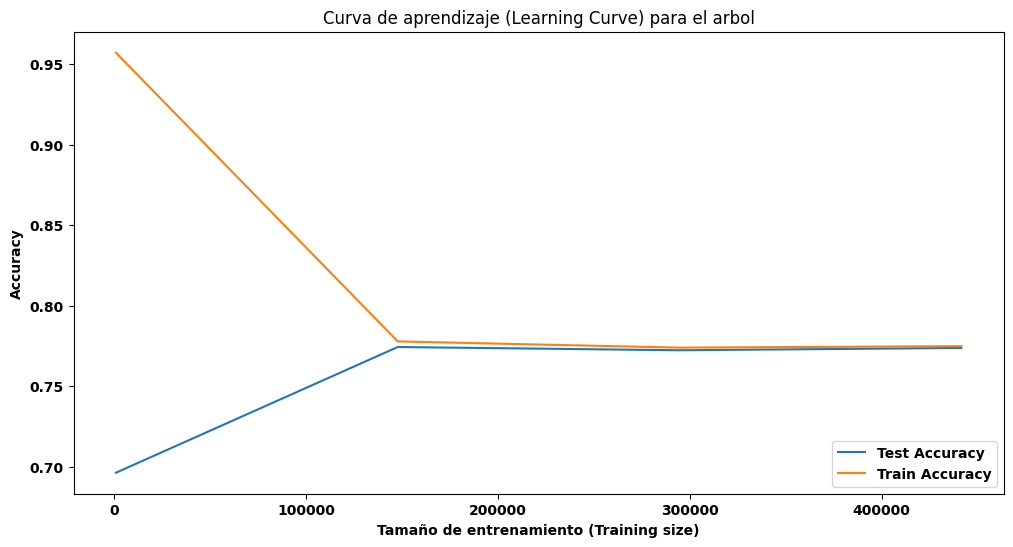

In [ ]:
# Crear un listado de los tamaños de subconjuntos de datos de entrenamiento
num_samples = np.linspace(1000,X_train.shape[0],4).astype(int)

# Generamos previamente los vectores necesarios para ir calculando y guardando el rendimiento
train_score = np.zeros(num_samples.size) 
test_score = np.zeros(num_samples.size)


for i in range(num_samples.size):
    # Generamos un modelo para cada subconjunto de datos de entrenamiento y lo ajustamos  
    XGBoost.fit(X_train[:num_samples[i]], y_train[:num_samples[i]])

    # Calculamos el área bajo la curva de funcionamiento del receptor sobre datos de train y de test
    train_score[i] = accuracy_score(y_train[:num_samples[i]], XGBoost.predict(X_train[:num_samples[i]])) 
    test_score[i] = accuracy_score(y_test, XGBoost.predict(X_test))

print("La diferencia final del rendimiento del modelo entre training y test es= ", train_score[-1]-test_score[-1])

# Graficamos el rendimiento de training versus de test
plt.plot(num_samples, test_score, label = 'Test Accuracy')
plt.plot(num_samples, train_score, label = 'Train Accuracy')
plt.title('Curva de aprendizaje (Learning Curve) para el arbol')
plt.xlabel('Tamaño de entrenamiento (Training size)')
plt.ylabel('Accuracy')
plt.legend(loc = 'lower right') 

---

### **`Ejercicio 18.7`**

Ahora probamos la creación de otros modelo basados en **métodos Bayesianos**:  

**`18.7.1`** Entrena un modelo para cada tipo de algoritmos Bayesianos y calcula las métricas correspondientes para analizar sus rendimientos en comparación con los modelos anteriores:
- `GaussianNB`
- `MultinomialNB`
- `ComplementNB`
- `BernoulliNB`
- Accuracy
- F1-score `(average='weighted')`
- Classification report `(zero_division=0)`

**`18.7.2`** Saca la gráfica del *Learning Curve* para el modelo `GaussianNB` y explica si este modelo sufre de un posible "_Overfitting_" o "_Underfitting_" comparando con modelos anteriores.
- `random_state=100`
- (*Sugerencia*: No incluya más de 10 puntos en el eje horizontal y empieza la gráfica con un mínimo de _1000_ muestras para el modelo)

**`18.7.1`**

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import BernoulliNB

In [ ]:
Gaussian=GaussianNB()
Gaussian.fit(X_train,y_train)

GaussianNB()

In [ ]:
Gaussian_predictions = Gaussian.predict(X_test)
print(accuracy_score(y_test, Gaussian_predictions))

0.08980641888525541


In [ ]:
print(f1_score(y_test, Gaussian_predictions,average='weighted'))

0.05616665960332174


In [ ]:
print(classification_report(y_test, Gaussian_predictions,zero_division=0))

              precision    recall  f1-score   support

           0       0.15      0.02      0.04     40051
           1       0.85      0.01      0.02     54101
           2       0.29      0.39      0.33      6784
           3       0.08      1.00      0.14       532
           4       0.03      0.75      0.05      1845
           5       0.15      0.08      0.10      3269
           6       0.11      0.95      0.20      3811

    accuracy                           0.09    110393
   macro avg       0.24      0.46      0.13    110393
weighted avg       0.50      0.09      0.06    110393



In [ ]:
Multinomial=MultinomialNB()
Multinomial.fit(X_train,y_train)

MultinomialNB()

In [ ]:
Multinomial_predictions = Multinomial.predict(X_test)
print(accuracy_score(y_test, Multinomial_predictions))

0.6415805349976901


In [ ]:
print(f1_score(y_test, Multinomial_predictions,average='weighted'))

0.6160717145804413


In [ ]:
print(classification_report(y_test, Multinomial_predictions,zero_division=0))

              precision    recall  f1-score   support

           0       0.66      0.46      0.54     40051
           1       0.65      0.81      0.72     54101
           2       0.56      0.93      0.70      6784
           3       0.58      0.11      0.19       532
           4       0.00      0.00      0.00      1845
           5       0.52      0.03      0.06      3269
           6       0.67      0.53      0.59      3811

    accuracy                           0.64    110393
   macro avg       0.52      0.41      0.40    110393
weighted avg       0.63      0.64      0.62    110393



In [ ]:
Complement=ComplementNB()
Complement.fit(X_train,y_train)

ComplementNB()

In [ ]:
Complement_predictions = Complement.predict(X_test)
print(accuracy_score(y_test, Complement_predictions))

0.618327249010354


In [ ]:
print(f1_score(y_test, Complement_predictions,average='weighted'))

0.5997760896707307


In [ ]:
print(classification_report(y_test, Complement_predictions,zero_division=0))

              precision    recall  f1-score   support

           0       0.62      0.49      0.54     40051
           1       0.66      0.74      0.70     54101
           2       0.49      0.96      0.64      6784
           3       0.00      0.00      0.00       532
           4       0.00      0.00      0.00      1845
           5       0.32      0.06      0.10      3269
           6       0.50      0.59      0.54      3811

    accuracy                           0.62    110393
   macro avg       0.37      0.40      0.36    110393
weighted avg       0.60      0.62      0.60    110393



In [ ]:
Bernoulli=BernoulliNB()
Bernoulli.fit(X_train,y_train)

BernoulliNB()

In [ ]:
Bernoulli_predictions = Bernoulli.predict(X_test)
print(accuracy_score(y_test, Bernoulli_predictions))

0.6318154230793619


In [ ]:
print(f1_score(y_test, Bernoulli_predictions,average='weighted'))

0.6184382200398265


In [ ]:
print(classification_report(y_test, Bernoulli_predictions,zero_division=0))

              precision    recall  f1-score   support

           0       0.65      0.47      0.54     40051
           1       0.65      0.77      0.71     54101
           2       0.60      0.89      0.72      6784
           3       0.50      0.32      0.39       532
           4       0.21      0.06      0.09      1845
           5       0.23      0.22      0.22      3269
           6       0.61      0.58      0.60      3811

    accuracy                           0.63    110393
   macro avg       0.50      0.47      0.47    110393
weighted avg       0.63      0.63      0.62    110393



**`18.7.2`**

La diferencia final del rendimiento del modelo entre training y test es=  6.422391494750879e-05


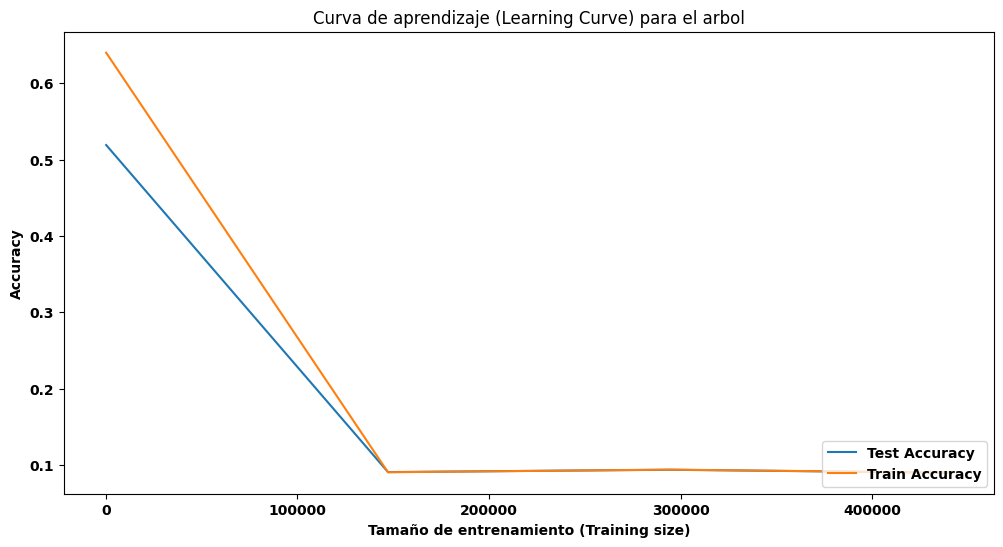

In [ ]:
# Crear un listado de los tamaños de subconjuntos de datos de entrenamiento
num_samples = np.linspace(100,X_train.shape[0],4).astype(int)

# Generamos previamente los vectores necesarios para ir calculando y guardando el rendimiento
train_score = np.zeros(num_samples.size) 
test_score = np.zeros(num_samples.size)


for i in range(num_samples.size):
    # Generamos un modelo para cada subconjunto de datos de entrenamiento y lo ajustamos  
    Gaussian.fit(X_train[:num_samples[i]], y_train[:num_samples[i]])

    # Calculamos el área bajo la curva de funcionamiento del receptor sobre datos de train y de test
    train_score[i] = accuracy_score(y_train[:num_samples[i]], Gaussian.predict(X_train[:num_samples[i]])) 
    test_score[i] = accuracy_score(y_test, Gaussian.predict(X_test))

print("La diferencia final del rendimiento del modelo entre training y test es= ", train_score[-1]-test_score[-1])

# Graficamos el rendimiento de training versus de test
plt.plot(num_samples, test_score, label = 'Test Accuracy')
plt.plot(num_samples, train_score, label = 'Train Accuracy')
plt.title('Curva de aprendizaje (Learning Curve) para el modelo Gaussiano')
plt.xlabel('Tamaño de entrenamiento (Training size)')
plt.ylabel('Accuracy')
plt.legend(loc = 'lower right') 

---

### **`Ejercicio 18.8`**

Ahora probamos la creación de otros modelo basados en **K vecinos más cercanos**:  

**`18.8.1`** Entrena un modelo tipo **K-Nearest Neighbors** con la configuración por defecto y otros dos modelos con `1` y `100` vecinos más cercanos. Calcula las métricas correspondientes para analizar sus rendimientos en comparación con el modelo anteriores:
- `random_state=100`
- Accuracy
- F1-score `(average='weighted')`
- Classification report `(zero_division=0)`

**`18.8.2`** Saca la gráfica del *Learning Curve* para estos modelos, definiendo y aplicando una función que toma el valor del hiperparámetro analizado como su entrada y dibuja la evolución del rendimiento del modelo para el conjunto de training y de test. Explica si este último modelo tiene preferencia o no, comparando con modelos anteriores.
- (*Sugerencia*: No incluya más de 5 puntos en el eje horizontal y empieza la gráfica con un mínimo de _1000_ muestras para el modelo)

**`18.8.1`**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
KNeigh=KNeighborsClassifier()
KNeigh1=KNeighborsClassifier(n_neighbors=1)
KNeigh100=KNeighborsClassifier(n_neighbors=100)
KNeigh.fit(X_train,y_train)
KNeigh1.fit(X_train,y_train)
KNeigh100.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=100)

In [ ]:
KNeigh_predictions = KNeigh.predict(X_test)
KNeigh1_predictions = KNeigh1.predict(X_test)
KNeigh100_predictions = KNeigh100.predict(X_test)
print(accuracy_score(y_test, KNeigh_predictions))
print(accuracy_score(y_test, KNeigh1_predictions))
print(accuracy_score(y_test, KNeigh100_predictions))

0.9352857518139737
0.9428134030237425
0.8489759314449286


In [ ]:
print(f1_score(y_test, KNeigh_predictions,average='weighted'))
print("KNeigh")
print(f1_score(y_test, KNeigh1_predictions,average='weighted'))
print("KNeigh1")
print(f1_score(y_test, KNeigh100_predictions,average='weighted'))
print("KNeigh100")

0.9351336108790245
KNeigh
0.9427819867601004
KNeigh1
0.8467061740335464
KNeigh100


In [ ]:
print(classification_report(y_test, KNeigh_predictions,zero_division=0))
print("KNeigh")
print(classification_report(y_test, KNeigh1_predictions,zero_division=0))
print("KNeigh1")
print(classification_report(y_test, KNeigh100_predictions,zero_division=0))
print("KNeigh100")

              precision    recall  f1-score   support

           0       0.94      0.93      0.94     40051
           1       0.94      0.95      0.95     54101
           2       0.92      0.92      0.92      6784
           3       0.87      0.73      0.79       532
           4       0.86      0.79      0.82      1845
           5       0.86      0.85      0.85      3269
           6       0.95      0.94      0.95      3811

    accuracy                           0.94    110393
   macro avg       0.90      0.87      0.89    110393
weighted avg       0.94      0.94      0.94    110393

KNeigh
              precision    recall  f1-score   support

           0       0.94      0.94      0.94     40051
           1       0.95      0.95      0.95     54101
           2       0.93      0.94      0.93      6784
           3       0.84      0.78      0.81       532
           4       0.85      0.83      0.84      1845
           5       0.88      0.88      0.88      3269
           6     

**`18.8.2`**

La diferencia final del rendimiento del modelo entre training y test es=  0.024679644229217867


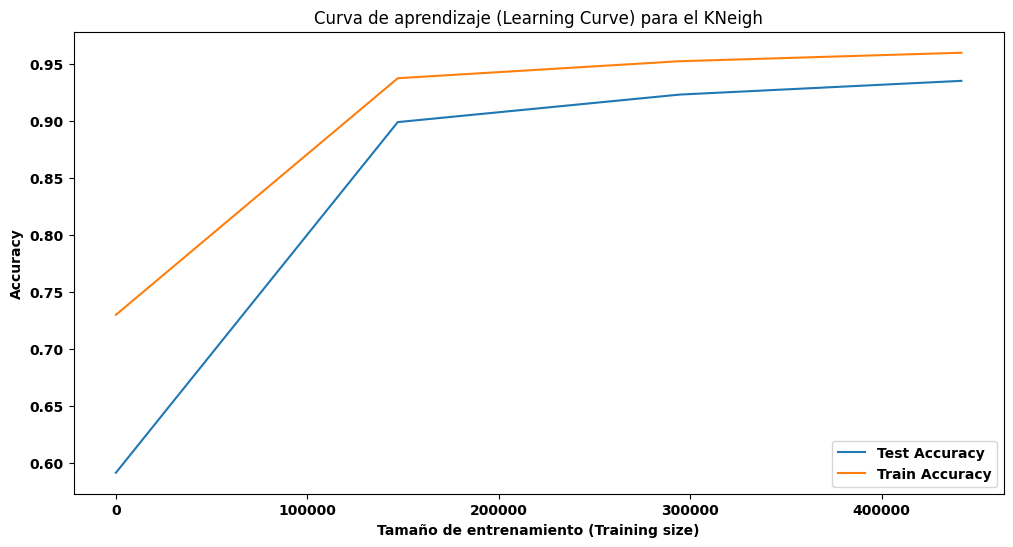

In [ ]:
# Crear un listado de los tamaños de subconjuntos de datos de entrenamiento
num_samples = np.linspace(1000,X_train.shape[0],4).astype(int)

# Generamos previamente los vectores necesarios para ir calculando y guardando el rendimiento
train_score = np.zeros(num_samples.size) 
test_score = np.zeros(num_samples.size)


for i in range(num_samples.size):
    # Generamos un modelo para cada subconjunto de datos de entrenamiento y lo ajustamos  
    KNeigh.fit(X_train[:num_samples[i]], y_train[:num_samples[i]])

    # Calculamos el área bajo la curva de funcionamiento del receptor sobre datos de train y de test
    train_score[i] = accuracy_score(y_train[:num_samples[i]], KNeigh.predict(X_train[:num_samples[i]])) 
    test_score[i] = accuracy_score(y_test, KNeigh.predict(X_test))

print("La diferencia final del rendimiento del modelo entre training y test es= ", train_score[-1]-test_score[-1])

# Graficamos el rendimiento de training versus de test
plt.plot(num_samples, test_score, label = 'Test Accuracy')
plt.plot(num_samples, train_score, label = 'Train Accuracy')
plt.title('Curva de aprendizaje (Learning Curve) para el KNeigh')
plt.xlabel('Tamaño de entrenamiento (Training size)')
plt.ylabel('Accuracy')
plt.legend(loc = 'lower right') 

In [ ]:
# Crear un listado de los tamaños de subconjuntos de datos de entrenamiento
num_samples = np.linspace(1000,X_train.shape[0],4).astype(int)

# Generamos previamente los vectores necesarios para ir calculando y guardando el rendimiento
train_score = np.zeros(num_samples.size) 
test_score = np.zeros(num_samples.size)


for i in range(num_samples.size):
    # Generamos un modelo para cada subconjunto de datos de entrenamiento y lo ajustamos  
    KNeigh1.fit(X_train[:num_samples[i]], y_train[:num_samples[i]])

    # Calculamos el área bajo la curva de funcionamiento del receptor sobre datos de train y de test
    train_score[i] = accuracy_score(y_train[:num_samples[i]], KNeigh1.predict(X_train[:num_samples[i]])) 
    test_score[i] = accuracy_score(y_test, KNeigh1.predict(X_test))

print("La diferencia final del rendimiento del modelo entre training y test es= ", train_score[-1]-test_score[-1])

# Graficamos el rendimiento de training versus de test
plt.plot(num_samples, test_score, label = 'Test Accuracy')
plt.plot(num_samples, train_score, label = 'Train Accuracy')
plt.title('Curva de aprendizaje (Learning Curve) para el KNeigh1')
plt.xlabel('Tamaño de entrenamiento (Training size)')
plt.ylabel('Accuracy')
plt.legend(loc = 'lower right') 

In [ ]:
# Crear un listado de los tamaños de subconjuntos de datos de entrenamiento
num_samples = np.linspace(1000,X_train.shape[0],4).astype(int)

# Generamos previamente los vectores necesarios para ir calculando y guardando el rendimiento
train_score = np.zeros(num_samples.size) 
test_score = np.zeros(num_samples.size)


for i in range(num_samples.size):
    # Generamos un modelo para cada subconjunto de datos de entrenamiento y lo ajustamos  
    KNeigh100.fit(X_train[:num_samples[i]], y_train[:num_samples[i]])

    # Calculamos el área bajo la curva de funcionamiento del receptor sobre datos de train y de test
    train_score[i] = accuracy_score(y_train[:num_samples[i]], KNeigh100.predict(X_train[:num_samples[i]])) 
    test_score[i] = accuracy_score(y_test, KNeigh100.predict(X_test))

print("La diferencia final del rendimiento del modelo entre training y test es= ", train_score[-1]-test_score[-1])

# Graficamos el rendimiento de training versus de test
plt.plot(num_samples, test_score, label = 'Test Accuracy')
plt.plot(num_samples, train_score, label = 'Train Accuracy')
plt.title('Curva de aprendizaje (Learning Curve) para el KNeigh')
plt.xlabel('Tamaño de entrenamiento (Training size)')
plt.ylabel('Accuracy')
plt.legend(loc = 'lower right') 

---

### **`Ejercicio 18.9`**

Ahora probamos la creación de otros modelo basados en **Redes Neuronales**:  

**`18.9.1`** Entrena un modelo tipo **MLPClassifier** y calcula las métricas correspondientes para analizar su rendimiento en comparación con los modelos anteriores:
- `random_state=100`


**`18.9.2`** Entrena otro modelo tipo _MLPClassifier_ indicando los siguientes hiperparámetros y calcula las métricas correspondientes para analizar su rendimiento en comparación con los modelos anteriores:
- `random_state=100`
- `hidden_layer_sizes=(100,200,100)`
- Número máximo de iteraciones igual a `10000`
- `alpha=1e-5`
- `tol=1e-5`

**`18.9.3`** Construye con la misma estructura del modelo definido en el paso anterior, una red neuronal profunda (**DNN**-Deep Neural Networks) usando la librería _keras_  realizando las preparaciones y tratamientos necesarias al respecto y considerando los siguientes parámetros. Después, calcula las métricas correspondientes para analizar su rendimiento en comparación con los modelos anteriores:
- `semilla = 883`
- `epochs = 50`
- `batch_size=100`
- `loss='binary_crossentropy`
- `optimizer='Adam'`
- `umbral = 0.5`
- Accuracy
- F1-score `(average='weighted')`
- Classification report `(zero_division=0)`

**`18.9.4`** Crea otra red neuronal profunda usando _keras_ y considerando los siguientes parámetros. Después, calcula las métricas correspondientes para analizar su rendimiento en comparación con los modelos anteriores:
- Definir las capas ocultas: 
   - Una capa densa con **50** neuronas y la misma función de activación que la red anterior
   - Una capa densa con **100** neuronas y la misma función de activación que la red anterior
   - Una capa densa con **200** neuronas y la misma función de activación que la red anterior
   - Una capa densa con **1000** neuronas y la misma función de activación que la red anterior
   - Una capa densa con **200** neuronas y la misma función de activación que la red anterior
   - Una capa densa con **100** neuronas y la misma función de activación que la red anterior
   - Una capa densa con **50** neuronas y la misma función de activación que la red anterior
      
- `semilla = 883`
- `epochs = 40`
- `batch_size=100`
- `loss='binary_crossentropy`
- `optimizer='Adam'`
- `umbral = 0.5`
- Accuracy
- F1-score `(average='weighted')`
- Classification report `(zero_division=0)`

**`18.9.5`** Saca la gráfica del *Learning Curve* para este último modelo y explica si tiene preferencia o no, comparando con modelos anteriores.
- `semilla = 883`
- `epochs = 40`
- `batch_size=8000`
- `loss='binary_crossentropy`
- `optimizer='Adam'`
- `umbral = 0.5`
- Accuracy
- F1-score `(average='weighted')`
- Classification report `(zero_division=0)`
- (*Sugerencia*: No incluya más de **5** puntos en el eje horizontal y empieza la gráfica con un mínimo de _1000_ muestras para el modelo)

**`18.9.1`**

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
MLPC=MLPClassifier(random_state=100)
MLPC.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


MLPClassifier(random_state=100)

In [ ]:
MLPC_predictions = MLPC.predict(X_test)
print(accuracy_score(y_test, MLPC_predictions))

0.8328698377614523


In [ ]:
print(f1_score(y_test, MLPC_predictions,average='weighted'))

0.8326218851104037


In [ ]:
print(classification_report(y_test, MLPC_predictions,zero_division=0))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82     40051
           1       0.84      0.87      0.85     54101
           2       0.85      0.84      0.85      6784
           3       0.87      0.73      0.79       532
           4       0.61      0.53      0.57      1845
           5       0.67      0.74      0.71      3269
           6       0.90      0.83      0.87      3811

    accuracy                           0.83    110393
   macro avg       0.80      0.77      0.78    110393
weighted avg       0.83      0.83      0.83    110393



**`18.9.2`**

In [ ]:
MLPC2=MLPClassifier(random_state=100, hidden_layer_sizes=(100,200,100),max_iter=100, alpha=1e-5,tol=1e-5)
MLPC2.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(100, 200, 100), max_iter=100,
              random_state=100, tol=1e-05)

In [ ]:
MLPC2_predictions = MLPC2.predict(X_test)
print(accuracy_score(y_test, MLPC2_predictions))

0.9170056072395895


In [ ]:
print(f1_score(y_test, MLPC2_predictions,average='weighted'))

0.9168749746056214


In [ ]:
print(classification_report(y_test, MLPC2_predictions,zero_division=0))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91     40051
           1       0.93      0.93      0.93     54101
           2       0.92      0.92      0.92      6784
           3       0.91      0.77      0.83       532
           4       0.82      0.75      0.78      1845
           5       0.85      0.87      0.86      3269
           6       0.92      0.95      0.93      3811

    accuracy                           0.92    110393
   macro avg       0.89      0.87      0.88    110393
weighted avg       0.92      0.92      0.92    110393



**`18.9.3`**

In [ ]:
import random
import tensorflow as tf
from keras.models import Sequential
from keras import Input
from keras.layers import Dense, Conv2D, Flatten
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score
from keras.backend import clear_session


In [ ]:

# Resetear el estado global de keras
clear_session()

# Fijar la semilla para conseguir la reproducibilidad de los resultados
semilla = 883
random.seed(semilla)   # Fijar la semilla a nivel de `python`
np.random.seed(semilla)  # Fijar la semilla a nivel de `numpy`  
tf.random.set_seed(semilla)  # Fijar la semilla a nivel de `tensorflow`

modelo_dnn = Sequential()

modelo_dnn.add(Input(shape=X_train.iloc[0,:].shape))

modelo_dnn.add(Dense(100, activation='relu'))
modelo_dnn.add(Dense(200, activation='relu'))
modelo_dnn.add(Dense(100, activation='relu'))

modelo_dnn.add(Dense(1, activation='softmax'))

modelo_dnn.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])


registros=modelo_dnn.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=100)


In [ ]:
y_pred_dnn = (modelo_dnn.predict(X_test) > 0.5).astype(int)

3450/3450 [==============================] - 5s 2ms/step


In [ ]:
from sklearn.metrics import classification_report, f1_score, accuracy_score

In [ ]:

accuracy = accuracy_score(y_test, y_pred_dnn)
f1 = f1_score(y_test, y_pred_dnn, average='weighted')
class_report = classification_report(y_test, y_pred_dnn, zero_division=0)

# Imprimir las métricas de evaluación
print(f"Accuracy: {accuracy:.4f}")
print(f"F1-score: {f1:.4f}")
print("Classification report:")
print(class_report)


Accuracy: 0.4901
F1-score: 0.3224
Classification report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     40051
           1       0.49      1.00      0.66     54101
           2       0.00      0.00      0.00      6784
           3       0.00      0.00      0.00       532
           4       0.00      0.00      0.00      1845
           5       0.00      0.00      0.00      3269
           6       0.00      0.00      0.00      3811

    accuracy                           0.49    110393
   macro avg       0.07      0.14      0.09    110393
weighted avg       0.24      0.49      0.32    110393



**`18.9.4`**

In [ ]:
# Resetear el estado global de keras
clear_session()

# Fijar la semilla para conseguir la reproducibilidad de los resultados
semilla = 883
random.seed(semilla)   # Fijar la semilla a nivel de `python`
np.random.seed(semilla)  # Fijar la semilla a nivel de `numpy`  
tf.random.set_seed(semilla)  # Fijar la semilla a nivel de `tensorflow`

modelo_dnn2 = Sequential()

modelo_dnn2.add(Input(shape=X_train.iloc[0,:].shape))

modelo_dnn2.add(Dense(50, activation='relu'))
modelo_dnn2.add(Dense(100, activation='relu'))
modelo_dnn2.add(Dense(200, activation='relu'))
modelo_dnn2.add(Dense(1000, activation='relu'))
modelo_dnn2.add(Dense(200, activation='relu'))
modelo_dnn2.add(Dense(100, activation='relu'))
modelo_dnn2.add(Dense(50, activation='relu'))

modelo_dnn2.add(Dense(1, activation='softmax'))

modelo_dnn2.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])


# Ajustar el modelo a los datos del entrenamiento.
registros2 = modelo_dnn2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=4, batch_size=100)


Epoch 1/4
4416/4416 [==============================] - 67s 15ms/step - loss: -142037533311824297984.0000 - accuracy: 0.4868 - val_loss: -1002963670070663839744.0000 - val_accuracy: 0.4901
Epoch 2/4
4416/4416 [==============================] - 65s 15ms/step - loss: nan - accuracy: 0.3822 - val_loss: nan - val_accuracy: 0.3628
Epoch 3/4
4416/4416 [==============================] - 64s 15ms/step - loss: nan - accuracy: 0.3651 - val_loss: nan - val_accuracy: 0.3628
Epoch 4/4
4416/4416 [==============================] - 62s 14ms/step - loss: nan - accuracy: 0.3651 - val_loss: nan - val_accuracy: 0.3628


In [ ]:
# Calcular las predicciones para el conjunto de test 
y_pred_dnn2 = (modelo_dnn2.predict(X_test) > 0.5).astype(int)

3450/3450 [==============================] - 14s 4ms/step


In [ ]:
accuracy = accuracy_score(y_test, y_pred_dnn2)
f1 = f1_score(y_test, y_pred_dnn2, average='weighted')
class_report = classification_report(y_test, y_pred_dnn2, zero_division=0)

# Imprimir las métricas de evaluación
print(f"Accuracy: {accuracy:.4f}")
print(f"F1-score: {f1:.4f}")
print("Classification report:")
print(class_report)

Accuracy: 0.3628
F1-score: 0.1932
Classification report:
              precision    recall  f1-score   support

           0       0.36      1.00      0.53     40051
           1       0.00      0.00      0.00     54101
           2       0.00      0.00      0.00      6784
           3       0.00      0.00      0.00       532
           4       0.00      0.00      0.00      1845
           5       0.00      0.00      0.00      3269
           6       0.00      0.00      0.00      3811

    accuracy                           0.36    110393
   macro avg       0.05      0.14      0.08    110393
weighted avg       0.13      0.36      0.19    110393



**`18.9.5`**

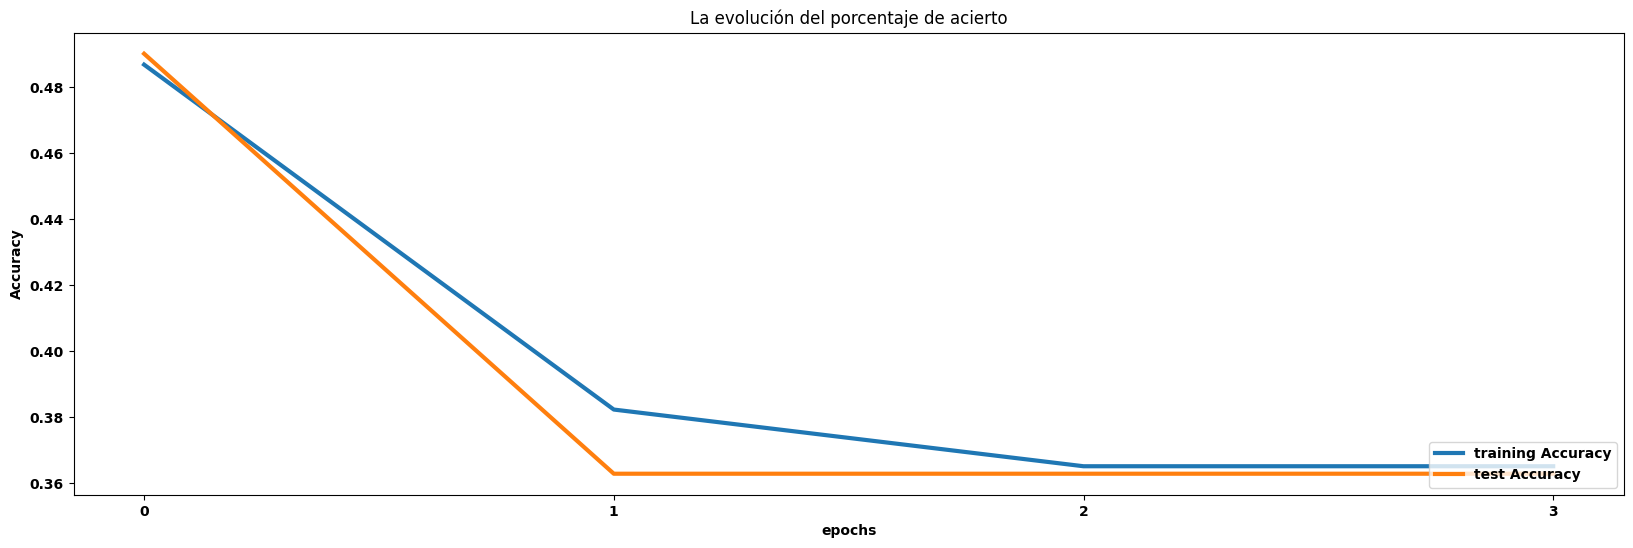

In [ ]:

# Graficamos la evolución del porcentaje de acierto (Accuracy)
plt.figure(figsize=(20,6))
plt.plot(registros2.epoch, registros2.history['accuracy'], linewidth=3, label='training Accuracy')
plt.plot(registros2.epoch, registros2.history['val_accuracy'], linewidth=3, label='test Accuracy')
plt.xticks(registros2.epoch)
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.title('La evolución del porcentaje de acierto')
plt.legend(loc = 'lower right')
plt.show()